In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor


In [289]:
df=pd.read_csv('zomato (1).csv',encoding='latin-1')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [290]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


this are the first 5 rows of the dataset.

In [291]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


this are the last 5 rows of the dataset.

In [292]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
7349,483,Moti Mahal Delux- Legendary Culinary,1,New Delhi,"E-31/32, South Extension 2, New Delhi",South Extension 2,"South Extension 2, New Delhi",77.219543,28.568234,"North Indian, Mughlai, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.6,Yellow,Good,177
7220,18377888,Pawar's Food Court Inc.,1,New Delhi,"R-18, Main Market, Shakarpur, New Delhi",Shakarpur,"Shakarpur, New Delhi",77.282849,28.633426,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
6312,18396396,Yumbuns,1,New Delhi,"Shop 6, QU Block, DDA Market, Pitampura, New D...",Pitampura,"Pitampura, New Delhi",77.140202,28.713288,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
2674,311544,The Cake Affairs,1,New Delhi,"C-391, 1st Floor, Yojna Vihar, Near Anand Viha...",Anand Vihar,"Anand Vihar, New Delhi",77.317027,28.662202,"Bakery, Desserts",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
144,16604911,Bridge Road Brewers,14,Beechworth,"Old Coach House 50 Ford St, Beechworth, Beechw...",Beechworth,"Beechworth, Beechworth",146.685852,-36.360439,"Pizza, Bar Food",...,Dollar($),No,No,No,No,2,4.6,Dark Green,Excellent,237


this are the some random samples taken from the dataset.

In [293]:
df.shape


(9551, 21)

this dataset contains 9551 rows and the 21 columns. out of that 1 is our target variable('Average cost for two').

In [294]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

as we can see in this dataset 3 columns data type is ('float64') and 5 columns datatype is ('int64') and 13 datatype ('object').

In [296]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [297]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan    

In [298]:
avp=df.iloc[:,:12]
avp.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P)
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P)
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P)


In [299]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

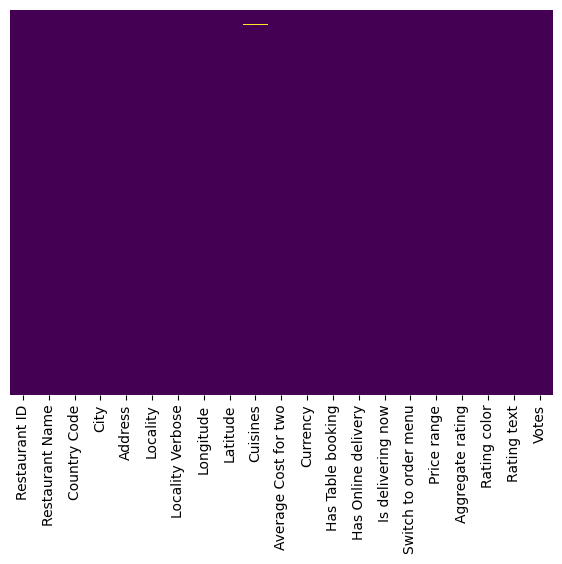

In [300]:
plt.rcParams['figure.figsize']=(7,5)
sns.heatmap(df.isnull(),yticklabels =False, cbar=False, cmap='viridis')

we have some null values in the ('cuisines') feature let's handle it. 

In [301]:
imp=SimpleImputer(strategy='most_frequent')
df['Cuisines']=imp.fit_transform(df['Cuisines'].values.reshape(-1,1))

In [302]:
# again checking the null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [303]:
df.nunique().to_frame()

,0
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [304]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


in the feature 'Votes' mean value is greater than the median('50%') percentile value. it means this feature is right skewed.

in the feature ('Longitude','Latitude') mean value is greater than the median('50%') percentile value. it means this feature is left skewed.

# Separating the features.

In [305]:
categorical_col=[]
numerical_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append([i])
    else :
        numerical_col.append([i])
        
print('categorical_features',categorical_col)
print('\n')
print('numerical_features',numerical_col)

categorical_features [['Restaurant Name'], ['City'], ['Address'], ['Locality'], ['Locality Verbose'], ['Cuisines'], ['Currency'], ['Has Table booking'], ['Has Online delivery'], ['Is delivering now'], ['Switch to order menu'], ['Rating color'], ['Rating text']]


numerical_features [['Restaurant ID'], ['Country Code'], ['Longitude'], ['Latitude'], ['Average Cost for two'], ['Price range'], ['Aggregate rating'], ['Votes']]


# Data Analysis.

univariate 

In [306]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


<Axes: xlabel='Longitude', ylabel='Density'>

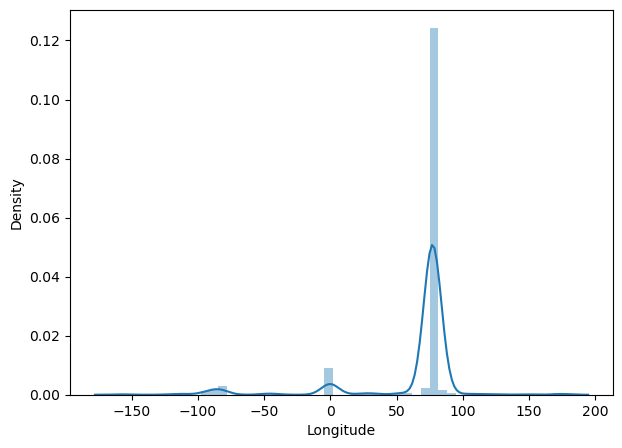

In [307]:
sns.distplot(df['Longitude'])

<Axes: xlabel='Latitude', ylabel='Density'>

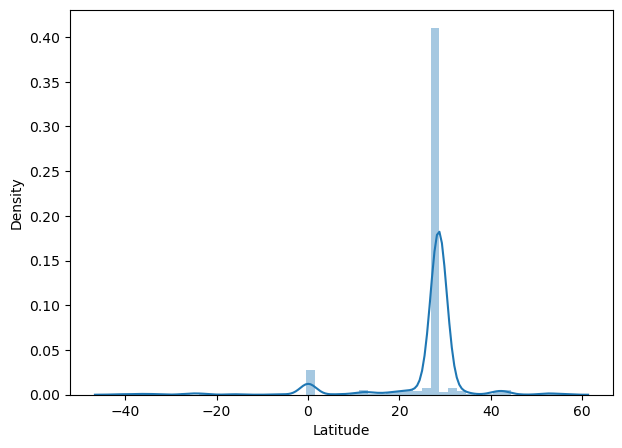

In [308]:
sns.distplot(df['Latitude'])

In [309]:
city_val=df.City.value_counts().values
city_val

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

# Top 3 city that uses Zomato 

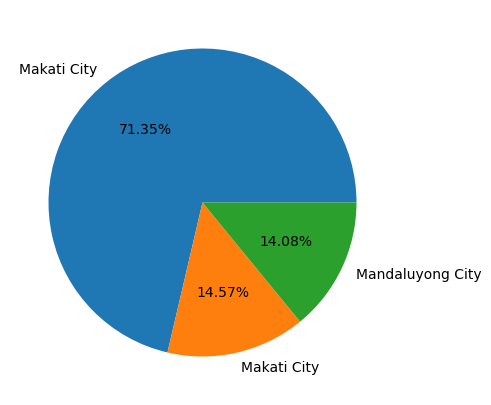

In [310]:
plt.pie(city_val[:3], labels=df['City'][:3],autopct='%1.2f%%');

In [311]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [312]:
df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


observation: 
    
when Rating is between 4.5 to 4.9 it means Excellent

when Rating is between 4.0 to 4.4 it means Very Good 

when Rating is between 3.5 to 3.9 it means Good

when Rating is between 2.5 to 3.4 it means Average

when Rating is between 2.0 to 2.4 it means poor

In [313]:
rating= df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [314]:
rating.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


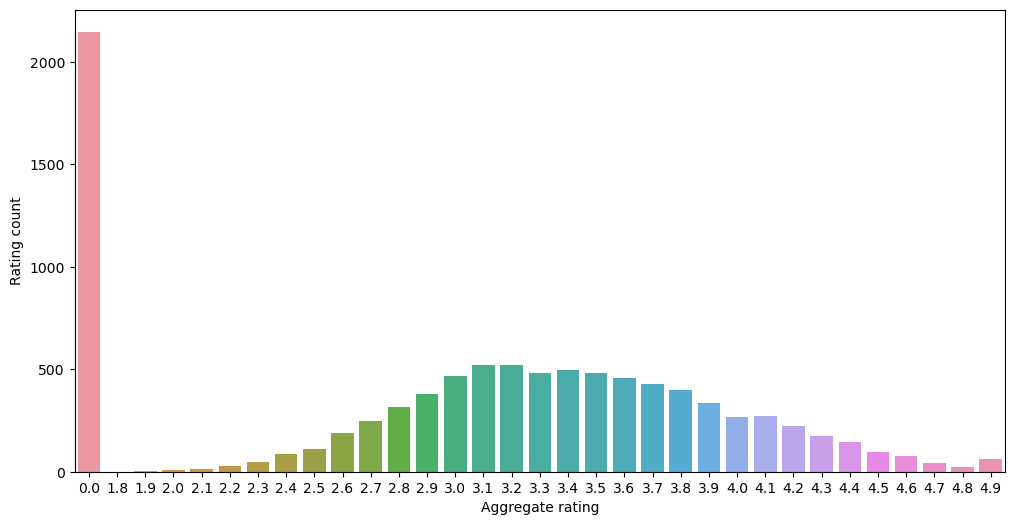

In [315]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x= 'Aggregate rating',y='Rating count', data=rating);

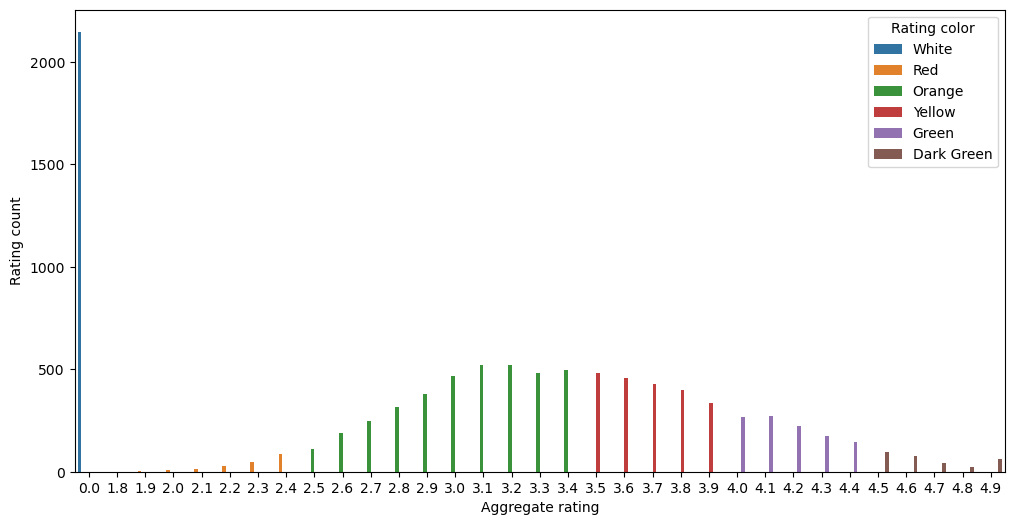

In [316]:
sns.barplot(x='Aggregate rating', y='Rating count',data=rating,hue='Rating color');

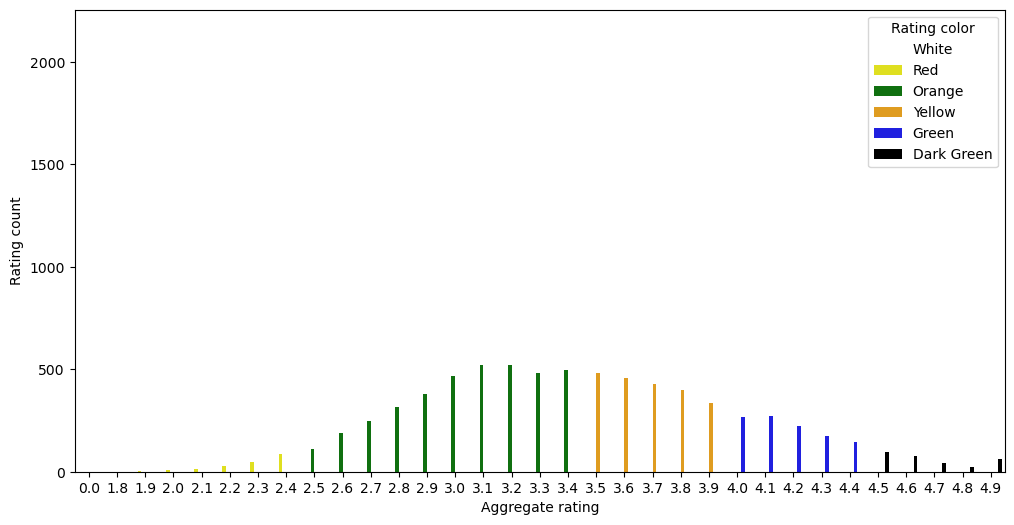

In [317]:
sns.barplot(x='Aggregate rating',y='Rating count', data=rating,hue='Rating color',palette=['white','yellow','green','orange','blue','black']);

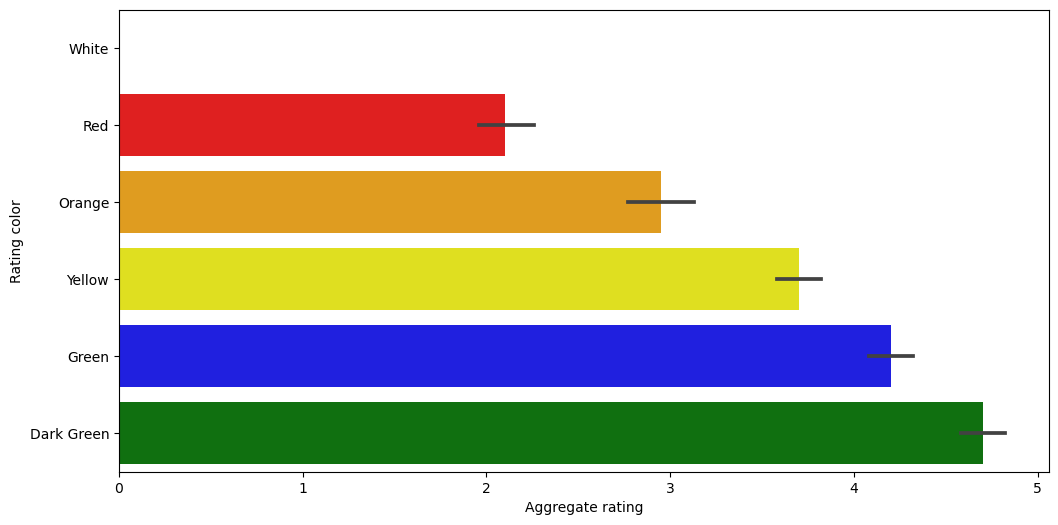

In [318]:
sns.barplot(x= 'Aggregate rating', y='Rating color',data=rating,palette=['white','red','orange','yellow','blue','green']);

observation:

    
1 - Not rated count is very high 

2 - maximum Number of rating are between 2.5 to 3.6

<Axes: xlabel='Rating color', ylabel='count'>

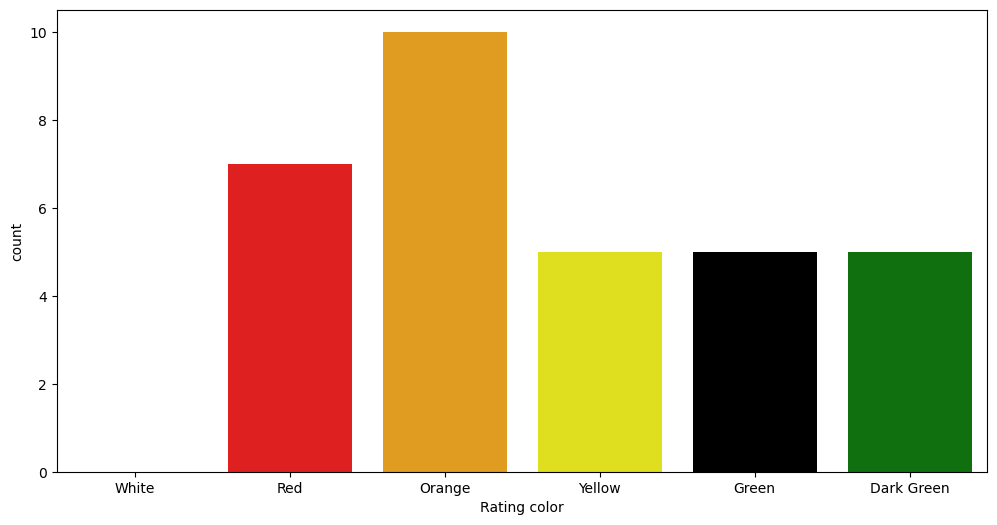

In [319]:
## Countplot
sns.countplot(x='Rating color', data=rating, palette=['white','red','orange','yellow','black','green'])

In [320]:
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [321]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [322]:
df[df['Rating color']=='White']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
30,6600060,Sandubas Cafí©,30,Brasí_lia,"Edifí_cio Josí© Severo, SCS 6, Bloco A, Loja 9...",Asa Sul,"Asa Sul, Brasí_lia",-47.890167,-15.797000,"Brazilian, Cafe",...,Brazilian Real(R$),No,No,No,No,1,0.0,White,Not rated,2
58,7305048,Quiosque Chopp Brahma,30,Rio de Janeiro,"Madureira Shopping - Loja 289/290, Piso 2, Est...",Madureira,"Madureira, Rio de Janeiro",-43.341164,-22.870413,"Bar Food, Brazilian",...,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,1
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
77,6701419,Divino Fogí£o,30,Sí£o Paulo,"Shopping MetríÇ Santa Cruz - Piso L2, Rua Domi...","Shopping MetríÇ Santa Cruz, Vila Mariana","Shopping MetríÇ Santa Cruz, Vila Mariana, Sí£o...",-46.637167,-23.599500,"Brazilian, Mineira",...,Brazilian Real(R$),No,No,No,No,3,0.0,White,Not rated,2
78,6703956,Super Grill,30,Sí£o Paulo,"Shopping Morumbi - Piso Lazer, Avenida Roque P...","Shopping Morumbi, Santo Amaro","Shopping Morumbi, Santo Amaro, Sí£o Paulo",-46.698574,-23.622925,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0
9112,18255132,The Grand,1,Noida,"G-5, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557852,"Raw Meats, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [323]:
df[df['Rating color']=='White'].groupby(['Aggregate rating','City']).size().reset_index()

,Aggregate rating,City,0
0,0.0,Birmingham,1
1,0.0,Brasí_lia,1
2,0.0,Davenport,2
3,0.0,Faridabad,100
4,0.0,Ghaziabad,2
5,0.0,Gurgaon,228
6,0.0,New Delhi,1425
7,0.0,Noida,384
8,0.0,Pocatello,1
9,0.0,Rio de Janeiro,1


Observation: 
    
maximum number of 0 ratings are from india customers.

In [324]:
# find out which currency is used by which city 
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# find out which currency is used by which city

In [325]:
df[['City','Currency']].groupby(['City','Currency']).size().reset_index()

,City,Currency,0
0,Abu Dhabi,Emirati Diram(AED),20
1,Agra,Indian Rupees(Rs.),20
2,Ahmedabad,Indian Rupees(Rs.),21
3,Albany,Dollar($),20
4,Allahabad,Indian Rupees(Rs.),20
...,...,...,...
136,Weirton,Dollar($),1
137,Wellington City,NewZealand($),20
138,Winchester Bay,Dollar($),1
139,Yorkton,Dollar($),1


which City do have online deliveries.

In [326]:
df[df['Has Online delivery']=='Yes'].City.value_counts()

New Delhi       1489
Gurgaon          425
Noida            364
Faridabad         35
Chennai           13
Abu Dhabi         11
Sharjah           11
Ahmedabad         11
Ghaziabad         10
Nagpur            10
Jaipur            10
Kolkata            8
Pune               7
Mumbai             7
Hyderabad          7
Coimbatore         7
Bangalore          7
Dubai              6
Chandigarh         6
Kochi              5
Mohali             1
Secunderabad       1
Name: City, dtype: int64

In [327]:
df[['Has Online delivery', 'City']].groupby(['Has Online delivery', 'City']).size().reset_index()

,Has Online delivery,City,0
0,No,Abu Dhabi,9
1,No,Agra,20
2,No,Ahmedabad,10
3,No,Albany,20
4,No,Allahabad,20
...,...,...,...
157,Yes,New Delhi,1489
158,Yes,Noida,364
159,Yes,Pune,7
160,Yes,Secunderabad,1


# Obeservation:
    
Online deliveries are available in india and UAE.

In [328]:
## create a pie chart for cities distribution 
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().values

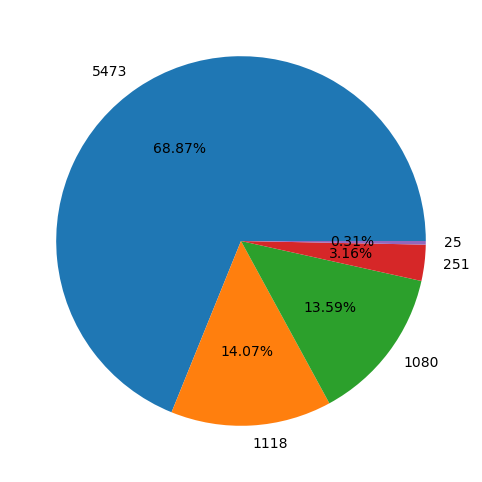

In [329]:
plt.pie(city_values[:5],labels=city_labels[:5], autopct='%1.2f%%');

In [330]:
costly=df[df['Average Cost for two']>3000].drop_duplicates()

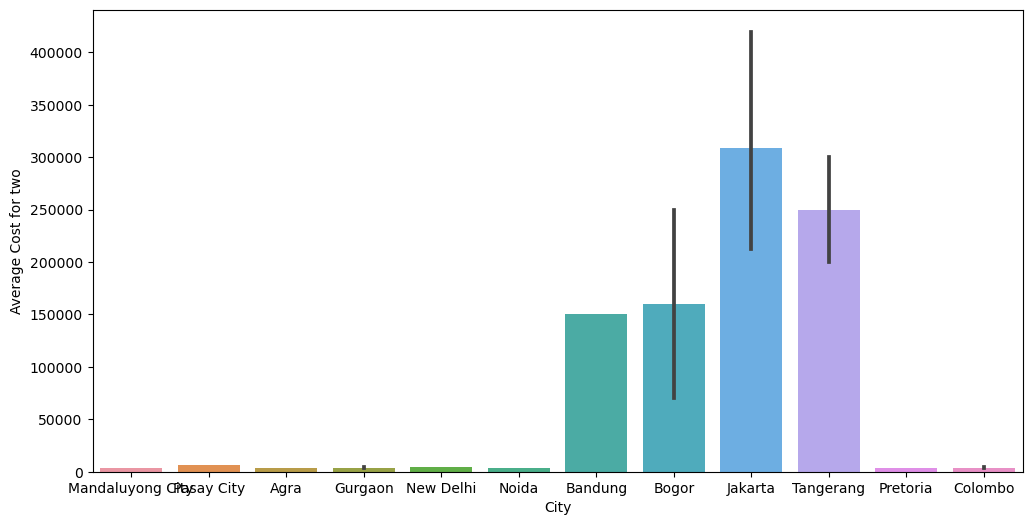

In [331]:
fig=sns.barplot(costly,x='City',y='Average Cost for two')
plt.show()

In [332]:
import plotly.express as px

In [333]:
cheap=df[df['Average Cost for two']<800].sort_values(by='Average Cost for two').drop_duplicates().tail(60)

In [334]:
figg=px.pie(cheap,values='Average Cost for two',names='City')
figg.show()

In [335]:
low_rated=df[df['Aggregate rating']<3.4]

In [336]:
# low rated city
figure=px.scatter(low_rated,x='City',y='Aggregate rating',color='Rating color')
figure.show()

In [337]:
top_rated=df[df['Aggregate rating']>4.5]
fig = px.scatter_mapbox(top_rated, lat='Latitude',lon='Longitude',hover_name='City',hover_data=['Aggregate rating','Restaurant Name'],
                        color_discrete_sequence=['fuchsia'], zoom=4, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.update_layout(title='Highly rated Restaurants Location',
                 autosize=True,
                 hovermode='closest',
                 showlegend=False)
fig.update_layout(
       autosize=False,
       width=800,
       height=500,)
fig.show()

# Checking outliers.

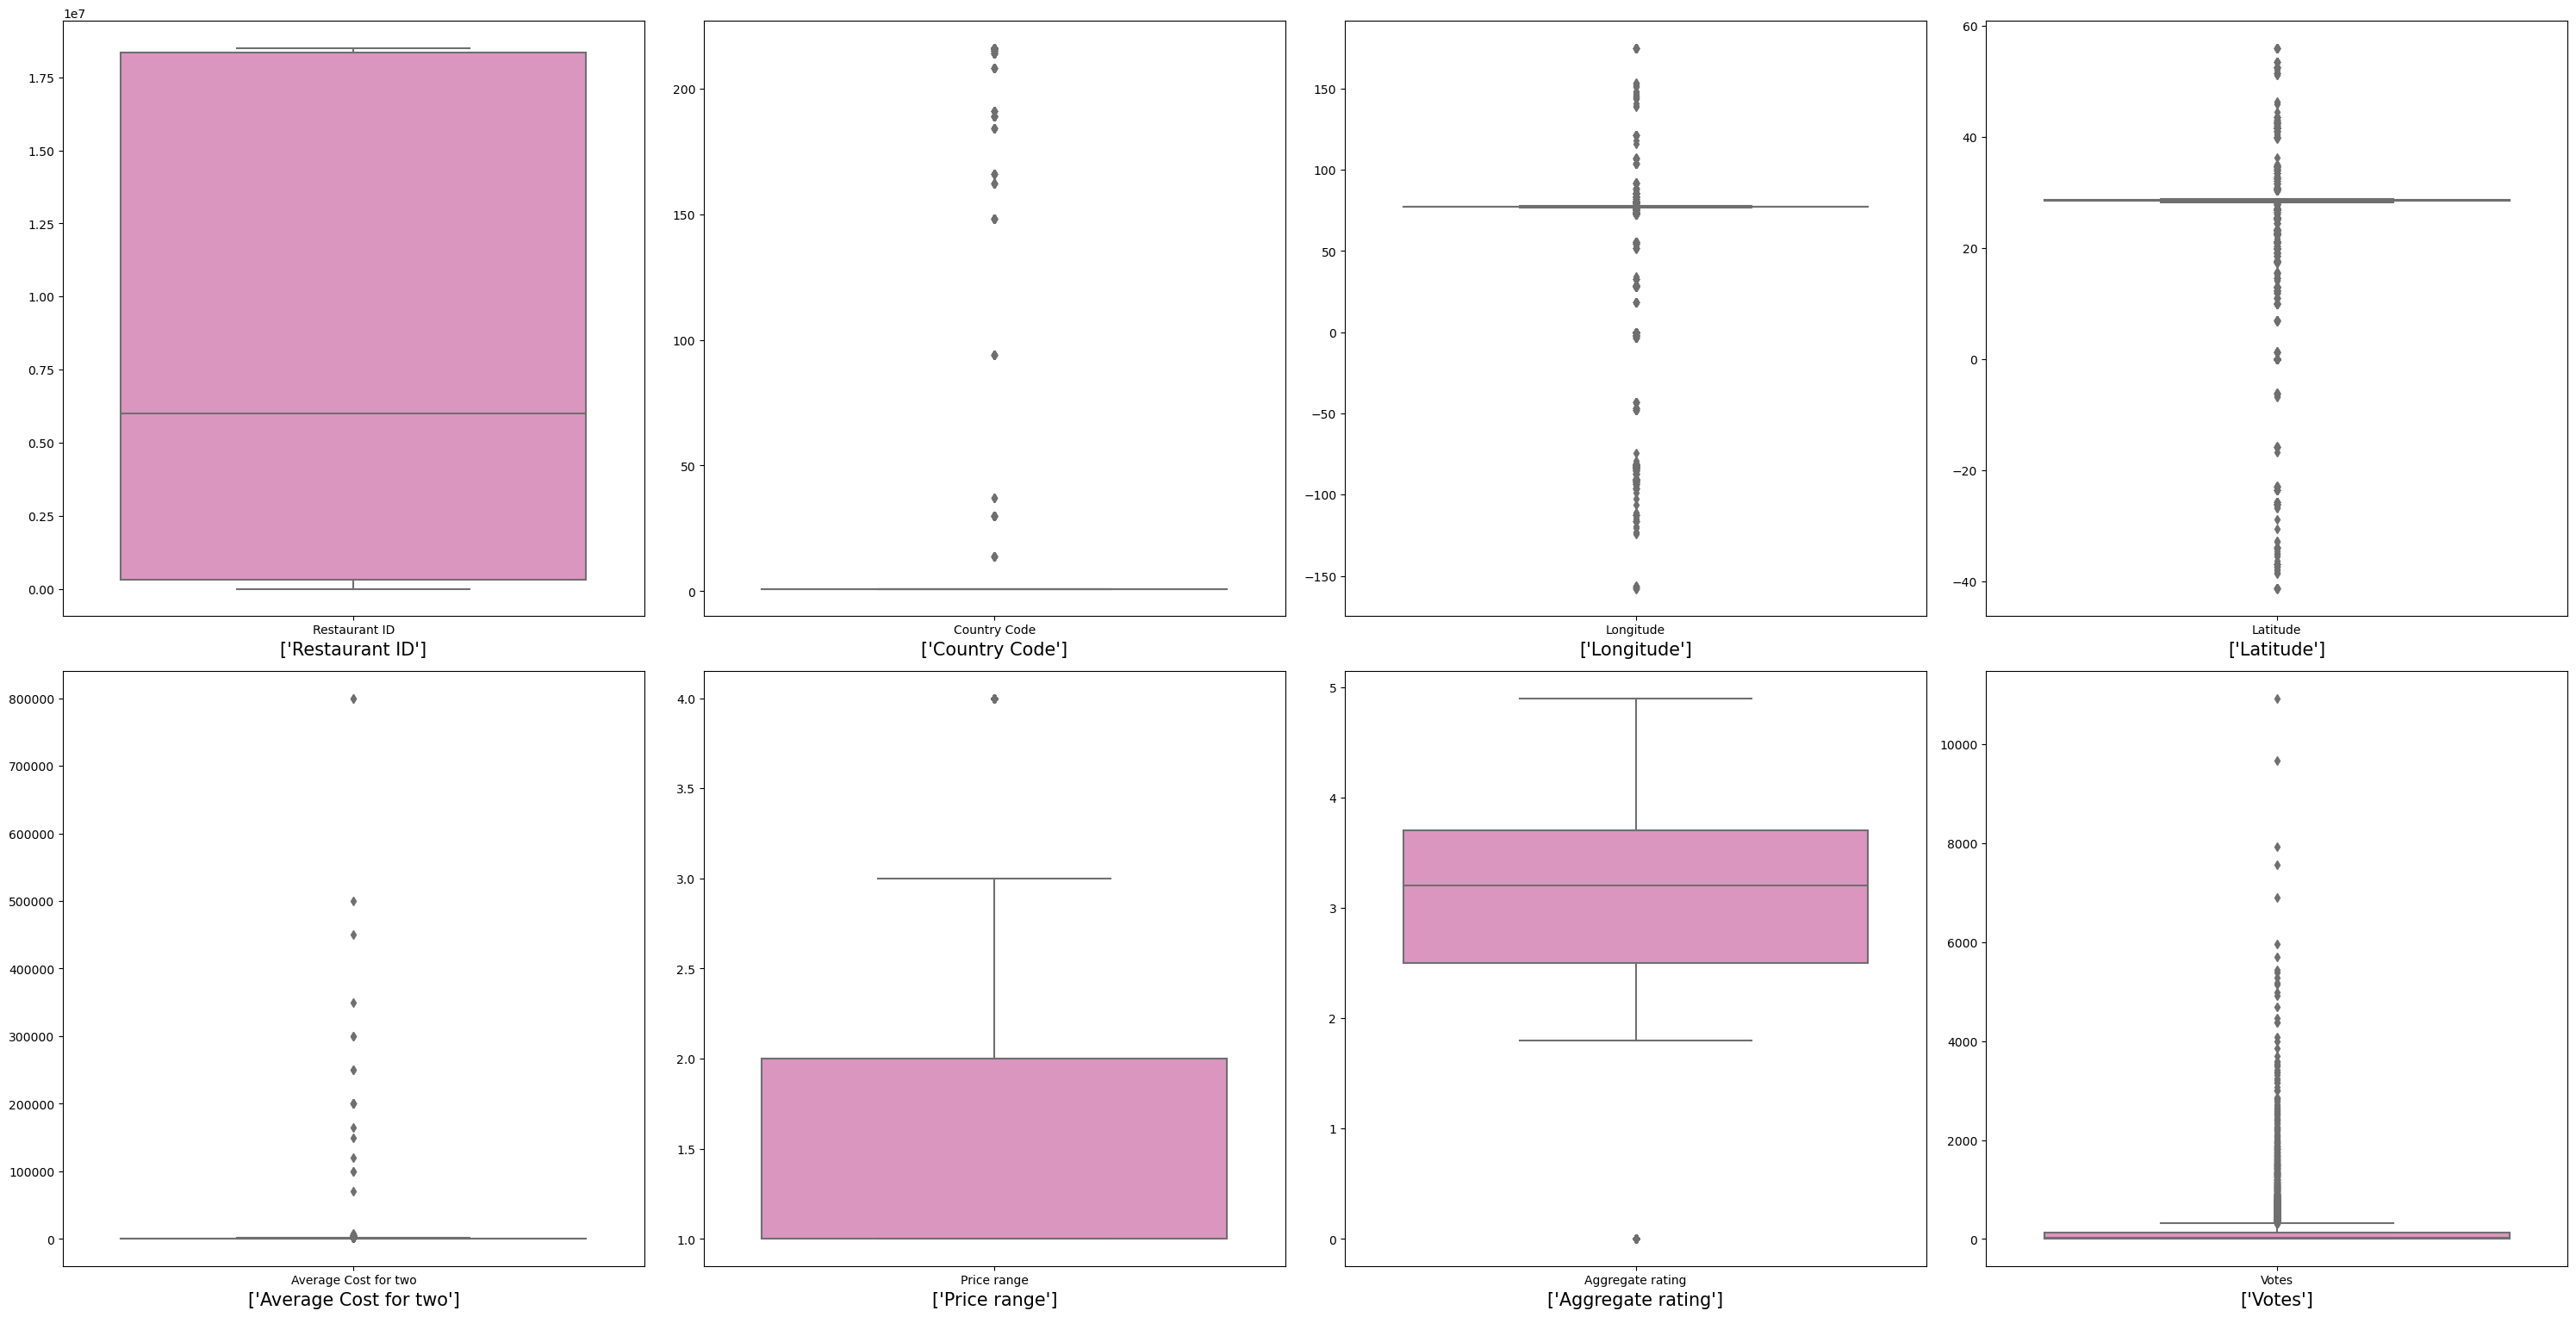

In [338]:
# Lets check the outliers by plotting boxplot
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [339]:
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [340]:
df['Country Code']=np.sqrt(df['Country Code'])
df['Price range']=np.sqrt(df['Price range'])
df['Aggregate rating']=np.sqrt(df['Aggregate rating'])
df['Votes']=np.sqrt(df['Votes'])

In [341]:
df.skew()

Restaurant ID            0.061570
Country Code             2.960357
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.584859
Aggregate rating        -1.218086
Votes                    2.518922
dtype: float64

# Label Encoding (transforming categorical column into numerical column).

In [342]:
lb=LabelEncoder()

In [343]:
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=lb.fit_transform(df[i])
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3749,12.727922,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,1.732051,2.190890,0,1,17.720045
1,6304287,3173,12.727922,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,1.732051,2.121320,0,1,24.310492
2,6300002,2897,12.727922,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,2.000000,2.097618,1,5,16.431677
3,6318506,4707,12.727922,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,0,2.000000,2.213594,0,1,19.104973
4,6314302,5523,12.727922,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,0,2.000000,2.190890,0,1,15.132746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,14.422205,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,0,1.732051,2.024846,1,5,28.071338
9547,5908749,1311,14.422205,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,0,1.732051,2.049390,1,5,32.155870
9548,5915807,3069,14.422205,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,0,2.000000,1.923538,5,2,25.709920
9549,5916112,513,14.422205,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,0,2.000000,2.000000,1,5,30.016662


here we converted the categorical features into the numercal features.

# Checking Correlation between the target variable and input features.

In [344]:
cor=df.corr()
cor

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,1.000000,0.003999,0.145819,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,-0.078644,...,-0.121472,-0.110071,-0.085089,0.012548,NaN,-0.135030,-0.366542,0.130540,0.251114,-0.264351
Restaurant Name,0.003999,1.000000,0.020394,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051679,...,0.009669,0.041173,0.028082,0.011984,NaN,0.061843,0.028965,-0.007311,0.012131,0.031664
Country Code,0.145819,0.020394,1.000000,-0.179830,-0.214648,-0.120154,-0.117569,-0.685388,-0.031455,-0.134809,...,-0.034332,-0.063297,-0.159127,-0.018701,NaN,0.251601,0.228735,-0.193990,0.226123,0.283953
City,-0.005844,-0.001399,-0.179830,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.026614,...,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.111349,-0.110141,0.110887,-0.098985,-0.116492
Address,0.080615,0.000763,-0.214648,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.023944,...,0.069499,0.006428,0.029874,0.031267,NaN,-0.043258,-0.144715,0.071264,-0.008029,-0.161410
Locality,0.069511,0.004322,-0.120154,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006993,...,0.023723,-0.065594,-0.030993,-0.007299,NaN,-0.117028,-0.158166,0.036831,-0.036969,-0.188470
Locality Verbose,0.070102,0.004281,-0.117569,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005960,...,0.022966,-0.065132,-0.031766,-0.007353,NaN,-0.114933,-0.157362,0.037104,-0.035430,-0.186963
Longitude,-0.226081,-0.001920,-0.685388,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.126197,...,0.337334,0.100488,0.178757,0.018787,NaN,-0.078772,-0.074774,0.059979,-0.181466,-0.146962
Latitude,-0.052081,0.009922,-0.031455,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038151,...,-0.101864,0.054658,0.118722,0.015001,NaN,-0.154195,0.028198,0.042590,-0.129447,-0.008594
Cuisines,-0.078644,0.051679,-0.134809,0.026614,0.023944,0.006993,0.005960,0.126197,0.038151,1.000000,...,0.068912,0.050639,-0.016639,0.007773,NaN,-0.003495,-0.061399,-0.016228,-0.079979,-0.056592


here we have to drop the Switch to order menu because in this feature we have only one value that is ('No') that's why it has converted into 0 value. and it is showing Nan.

In [345]:
df.drop('Switch to order menu',axis=1,inplace=True)

In [346]:
# again checking the correlation 
cor=df.corr()
cor

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,1.000000,0.003999,0.145819,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,-0.078644,-0.001693,-0.121472,-0.110071,-0.085089,0.012548,-0.135030,-0.366542,0.130540,0.251114,-0.264351
Restaurant Name,0.003999,1.000000,0.020394,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051679,0.019241,0.009669,0.041173,0.028082,0.011984,0.061843,0.028965,-0.007311,0.012131,0.031664
Country Code,0.145819,0.020394,1.000000,-0.179830,-0.214648,-0.120154,-0.117569,-0.685388,-0.031455,-0.134809,0.070115,-0.034332,-0.063297,-0.159127,-0.018701,0.251601,0.228735,-0.193990,0.226123,0.283953
City,-0.005844,-0.001399,-0.179830,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.111349,-0.110141,0.110887,-0.098985,-0.116492
Address,0.080615,0.000763,-0.214648,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.023944,0.022749,0.069499,0.006428,0.029874,0.031267,-0.043258,-0.144715,0.071264,-0.008029,-0.161410
Locality,0.069511,0.004322,-0.120154,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.117028,-0.158166,0.036831,-0.036969,-0.188470
Locality Verbose,0.070102,0.004281,-0.117569,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005960,-0.011852,0.022966,-0.065132,-0.031766,-0.007353,-0.114933,-0.157362,0.037104,-0.035430,-0.186963
Longitude,-0.226081,-0.001920,-0.685388,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078772,-0.074774,0.059979,-0.181466,-0.146962
Latitude,-0.052081,0.009922,-0.031455,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.154195,0.028198,0.042590,-0.129447,-0.008594
Cuisines,-0.078644,0.051679,-0.134809,0.026614,0.023944,0.006993,0.005960,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.003495,-0.061399,-0.016228,-0.079979,-0.056592


<Axes: >

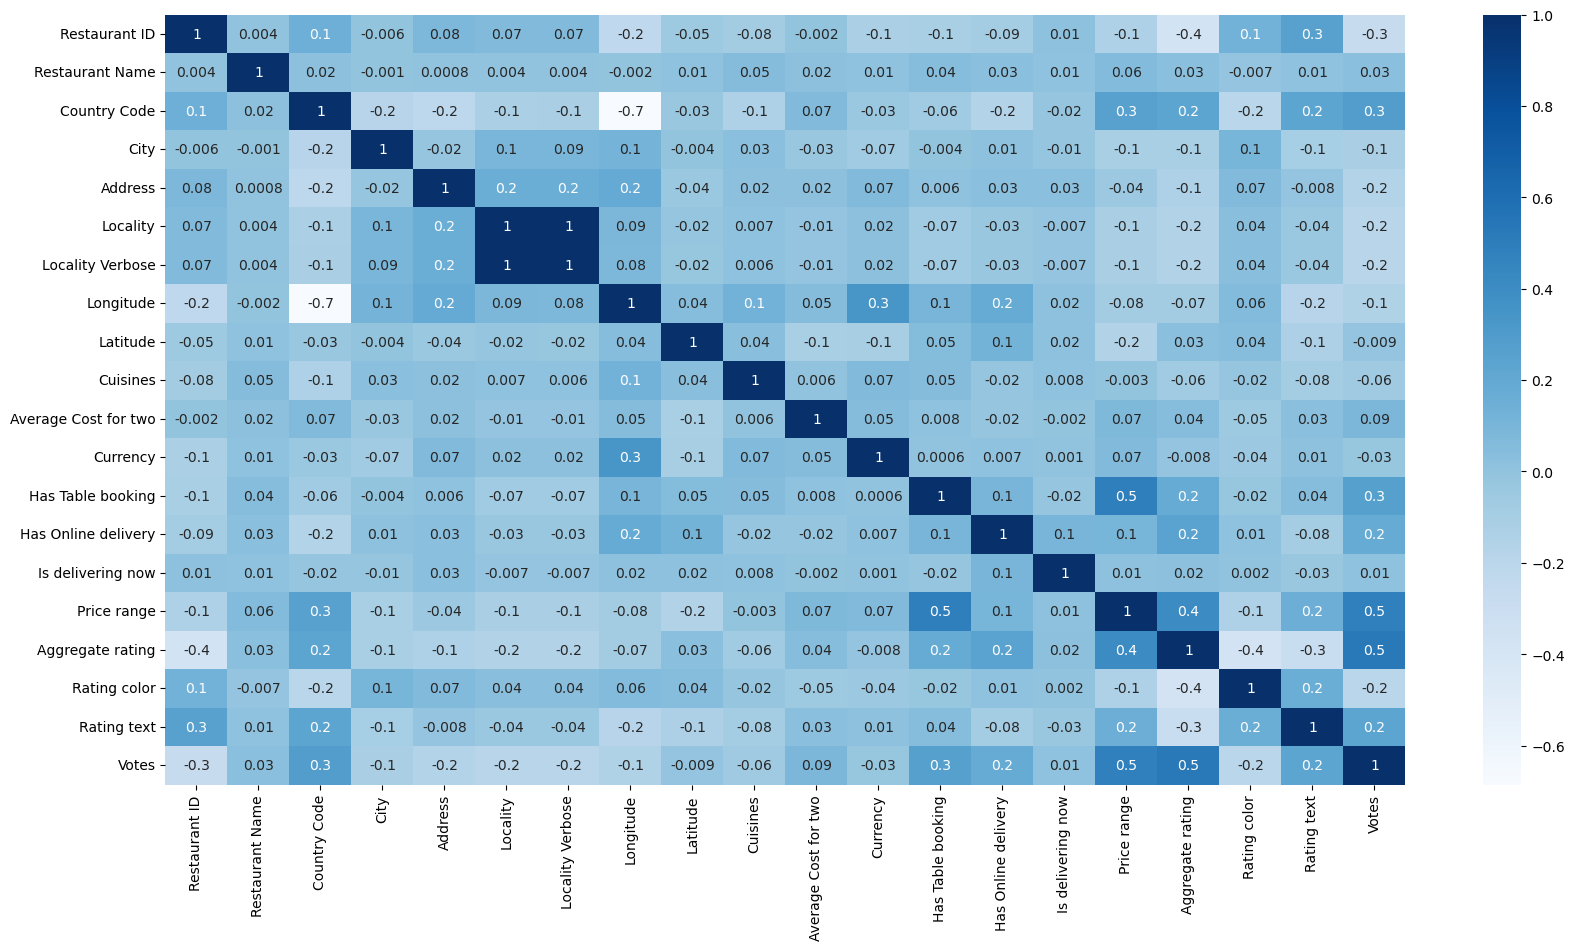

In [347]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,cmap='Blues',annot=True,fmt='.1g')

In [348]:
cor['Average Cost for two'].sort_values(ascending=True)

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005831
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Aggregate rating        0.040639
Currency                0.045615
Longitude               0.045891
Country Code            0.070115
Price range             0.074710
Votes                   0.087358
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

their is no that much positive relationship between the input features and the target variable.

# Separating Features

In [349]:
x=df.drop('Average Cost for two',axis=1)
y=df['Average Cost for two']
print('dimension of the features',x.shape)
print('dimension of the target variable',y.shape)

dimension of the features (9551, 19)
dimension of the target variable (9551,)


# Scaling the features(using Standard Scaler)

In [350]:
std=StandardScaler()

In [351]:
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.310940,0.044706,2.854862,-0.228533,1.614667,-1.542278,-1.523333,1.372269,-1.025581,-0.135100,-4.351046,2.692181,-0.587547,-0.059771,1.328431,0.968059,-1.977859,-0.465442,1.003226
1,-0.312458,-0.224101,2.854862,-0.228533,0.589558,-0.206201,-0.230035,1.371945,-1.026647,0.236387,-4.351046,2.692181,-0.587547,-0.059771,1.328431,0.879201,-1.977859,-0.465442,1.710738
2,-0.312946,-0.352904,2.854862,-0.142317,0.055177,-1.108528,-1.095249,1.372975,-1.024131,1.325565,-4.351046,2.692181,-0.587547,-0.059771,2.160540,0.848927,-1.308053,1.895070,0.864914
3,-0.310841,0.491783,2.854862,-0.142317,1.616615,0.645470,0.595987,1.372966,-1.023775,0.265562,-4.351046,-0.371446,-0.587547,-0.059771,2.160540,0.997058,-1.977859,-0.465442,1.151904
4,-0.311319,0.872592,2.854862,-0.142317,1.616226,0.645470,0.595987,1.372991,-1.023854,0.257782,-4.351046,2.692181,-0.587547,-0.059771,2.160540,0.968059,-1.977859,-0.465442,0.725468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-0.356658,0.368580,3.312494,2.659685,0.539277,-0.446821,-0.465180,-0.847685,1.378025,1.601750,7.681415,-0.371446,-0.587547,-0.059771,1.328431,0.755980,-1.308053,1.895070,2.114481
9547,-0.357452,-1.093055,3.312494,2.659685,0.553309,-0.336009,-0.359666,-0.846144,1.376849,1.623144,7.681415,-0.371446,-0.587547,-0.059771,1.328431,0.787329,-1.308053,1.895070,2.552973
9548,-0.356649,-0.272635,3.312494,2.659685,0.554868,-0.329677,-0.350622,-0.846305,1.381025,0.234442,7.681415,-0.371446,-0.587547,-0.059771,2.160540,0.626585,1.371170,0.124686,1.860973
9549,-0.356614,-1.465464,3.312494,2.659685,0.555258,-0.329677,-0.350622,-0.846272,1.381221,1.298336,7.681415,-0.371446,-0.587547,-0.059771,2.160540,0.724245,-1.308053,1.895070,2.323320


Checking  variance_inflation_factor values.

In [352]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Variables']=x.columns
vif

,Vif values,Variables
0,1.367630,Restaurant ID
1,1.008428,Restaurant Name
2,2.565533,Country Code
3,1.081838,City
4,1.108748,Address
5,955.727975,Locality
6,954.745669,Locality Verbose
7,2.439503,Longitude
8,1.111767,Latitude
9,1.046975,Cuisines


Locality and Locality Verbose features are highly correlated with the other features it means it will create the issue of multicolinearity.
so let's drop the Locality feature because it has highly vif values.

In [354]:
x.drop('Locality',axis=1,inplace=True)

In [356]:
# again checking the vif values 
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Variables']=x.columns
vif

,VIF values,Variables
0,1.367625,Restaurant ID
1,1.008412,Restaurant Name
2,2.562965,Country Code
3,1.073576,City
4,1.107128,Address
5,1.069996,Locality Verbose
6,2.439462,Longitude
7,1.111753,Latitude
8,1.046665,Cuisines
9,1.285103,Currency


now all the values in a perticular range it means their will be no issue of multicolinearity.

# Modeling

# creating train test split

In [364]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

# Linear Regression.

In [366]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('r2_score',r2_score(y_test,pred_lr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_lr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_lr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score 0.029395327941873384
r2_score on training data 0.046760550182772365
mean_squared_error 261889558.4828529
mean_absolute_error 2117.4257712798044
sqrt mean_squared_error 16183.002146785155


# SVR (support vector Regressor)

In [367]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score ',r2_score(y_test,pred_svr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_svr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_svr))
print('sqrt',np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score  -0.0010140261296995856
r2_score on training data -0.001526738115344095
mean_squared_error 270094641.91261417
mean_absolute_error 814.3744668606275
sqrt 16434.556334523124


# Decision Tree Regressor.

In [371]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score',r2_score(y_test,pred_dtr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_dtr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_dtr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score -0.008504740282475387
r2_score on training data 1.0
mean_squared_error 272115794.1681786
mean_absolute_error 632.3042568039078
sqrt mean_squared_error 16495.932655299566


# KNeighbor Regressor.

In [374]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score',r2_score(y_test,pred_knn))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_knn))
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score 0.5961765880226371
r2_score on training data 0.6868624135735354
mean_squared_error 108960051.51462667
mean_absolute_error 595.0201674808094
sqrt mean_squared_error 10438.393148115598


# Random Forest Regressor.

In [375]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('r2_score',r2_score(y_test,pred_rfr))
print('r2_score on training data',r2_score(y_test,pred_rfr))
print('mean_squared_error',mean_squared_error(y_test,pred_rfr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_rfr))
print('sqrt mean_squared_error',(np.sqrt(mean_squared_error(y_test,pred_rfr))))

r2_score 0.4489847532257093
r2_score on training data 0.4489847532257093
mean_squared_error 148675504.91905856
mean_absolute_error 566.1061723656665
sqrt mean_squared_error 12193.256534620214


# Extra Trees Regressor

In [377]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2_score',r2_score(y_test,pred_etr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_etr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_etr))
print('sqrt mean_sqaured_error',np.sqrt(mean_squared_error(y_test,pred_etr)))

r2_score 0.4222327866619835
r2_score on training data 0.9999999999502531
mean_squared_error 155893748.26118687
mean_absolute_error 540.9397138869505
sqrt mean_sqaured_error 12485.741798595183


# AdaBoost Regressor

In [378]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr=abr.predict(x_test)
pred_train=abr.predict(x_train)
print('r2_score',r2_score(y_test,pred_abr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_abr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_abr))
print('sqrt mean_sqaured_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score 0.4915021888731045
r2_score on training data 0.9442216649434079
mean_squared_error 137203406.37052345
mean_absolute_error 723.0681581825895
sqrt mean_sqaured_error 16495.932655299566


# Gradient Boosting Regressor.

In [386]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print('r2_score',r2_score(y_test,pred_gbr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_gbr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_gbr)))

r2_score 0.42016976246184357
r2_score on training data 0.999550143824477
mean_squared_error 156450395.58884543
mean_absolute_error 552.3336883183559
sqrt mean_squared_error 12508.013255063548


# Cross Validation Score

In [387]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_lr)-score1.mean())*100)

[-7.73467415e+03 -2.09752915e+01 -4.56232573e+00 -2.28101073e+00
 -7.77072987e-03]
-1552.5001096805274
difference between the cross validation score and r2_score 155252.95050084693


In [389]:
score2=cross_val_score(dtr,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation r2_score',r2_score(y_test,pred_dtr)-score2.mean()*100)

[-3.19469384e+04  6.75414149e-01  7.47386752e-01  7.77730754e-01
 -5.38540178e-03]
-6388.948659021573
difference between the cross validation r2_score 638894.857397417


In [390]:
score3=cross_val_score(svr,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and r2_score',r2_score(y_test,pred_svr)-score3.mean()*100)

[ 0.16563566  0.15610246  0.28884558  0.17451563 -0.00715701]
0.15558846475150098
difference between the cross validation score and r2_score -15.559860501279797


In [391]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validarion score and r2_score',(r2_score(y_test,pred_knn)-score4.mean())*100)

[-6.59633707e+02  6.79621115e-01  6.71062470e-01  6.76266926e-01
 -5.27031553e-03]
-131.52240528658587
difference between the cross validarion score and r2_score 13211.858187460852


In [392]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,pred_rfr)-score5.mean())*100)

[-6.51772637e+03  8.45408746e-01  8.20813501e-01  8.41541730e-01
 -7.07251602e-03]
-1303.045134873993
difference between the cross validation score and the r2_score 130349.41196272186


In [393]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and r2_score',r2_score(y_test,pred_etr)-score6.mean()*100)

[-2.76062307e+03 -1.31029083e+01  8.28207374e-01  7.85998546e-01
 -6.97969263e-03]
-554.4237506397998
difference between the cross validation score and r2_score 55442.797296766636


In [394]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_abr)-score7.mean())*100)

[-1.20080253e+03 -5.21793967e-02  3.45815042e-01  5.19490088e-01
 -3.86039244e-03]
-239.9986531462479
difference between the cross validation score and r2_score 24049.0155335121


In [395]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between cross validation score and r2_score',(r2_score(y_test,pred_gbr)-score8.mean())*100)

[-1.07692582e+04  8.21142248e-01  7.98431885e-01  7.64857574e-01
 -7.20592426e-03]
-2153.3761854008408
difference between cross validation score and r2_score 215379.63551633025


here our SVR(support vector regressor) is working well and good we will save this model.

# Saving model

In [396]:
final_model=SVR()
final_model.fit(x_train,y_train)
pred1=final_model.predict(x_test)
print('r2_score',r2_score(y_test,pred1))
print('mean_squared_error',mean_squared_error(y_test,pred1))
print('mean_absolute_error',mean_absolute_error(y_test,pred1))
print('sqrt mean_sqaured_error',np.sqrt(mean_squared_error(y_test,pred1)))

r2_score -0.0010140261296995856
mean_squared_error 270094641.91261417
mean_absolute_error 814.3744668606275
sqrt mean_sqaured_error 16434.556334523124


In [397]:
import joblib

In [400]:
joblib.dump(final_model,'zomato_Analysis.pkl')

['zomato_Analysis.pkl']

In [401]:
result=joblib.load('zomato_Analysis.pkl')

In [402]:
result.predict(x_test)

array([386.71947133, 553.71722352, 507.07444326, ..., 593.41994848,
       289.62197172, 508.53108813])

# 2 model prediction (Price range)

In [403]:
df1=pd.read_csv('zomato (1).csv',encoding='latin-1')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [405]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


this are the first five rows of the dataset.

In [406]:
df1.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


this are the last 5 rows of the dataset.

In [407]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
8357,312175,2394,1.000000,89,7539,903,923,77.314101,28.581443,1554,400,4,0,0,0,1.000000,1.673320,2,0,2.449490
159,17303787,3955,14.696938,20,2844,129,130,-116.202100,43.616200,1786,40,2,0,0,0,1.732051,2.000000,1,5,18.439089
175,17316744,5757,14.696938,23,872,466,472,-91.534424,41.660982,294,10,2,0,0,0,1.000000,2.213594,0,1,28.635642
3219,2437,38,1.000000,88,1562,274,280,77.230277,28.572796,1031,1500,4,1,1,0,1.732051,1.974842,5,2,15.652476
4827,303784,3936,1.000000,88,2306,563,570,77.242465,28.575349,1306,100,4,0,1,0,1.000000,1.612452,2,0,3.162278


In [408]:
df1.shape

(9551, 21)

this dataset contains 9551 rows and 21 columns out of that 1 is our target variable ('Price range').

# Separating the features

In [411]:
x=df.drop('Price range',axis=1)
y=df['Price range']
print('dimension of features is',x.shape)
print('dimension of target variable is',y.shape)

dimension of features is (9551, 19)
dimension of target variable is (9551,)


# Scaling features (using Standard Scaler).

In [412]:
std=StandardScaler()

In [413]:
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-0.310940,0.044706,2.854862,-0.228533,1.614667,-1.542278,-1.523333,1.372269,-1.025581,-0.135100,-0.006154,-4.351046,2.692181,-0.587547,-0.059771,0.968059,-1.977859,-0.465442,1.003226
1,-0.312458,-0.224101,2.854862,-0.228533,0.589558,-0.206201,-0.230035,1.371945,-1.026647,0.236387,0.000049,-4.351046,2.692181,-0.587547,-0.059771,0.879201,-1.977859,-0.465442,1.710738
2,-0.312946,-0.352904,2.854862,-0.142317,0.055177,-1.108528,-1.095249,1.372975,-1.024131,1.325565,0.173743,-4.351046,2.692181,-0.587547,-0.059771,0.848927,-1.308053,1.895070,0.864914
3,-0.310841,0.491783,2.854862,-0.142317,1.616615,0.645470,0.595987,1.372966,-1.023775,0.265562,0.018659,-4.351046,-0.371446,-0.587547,-0.059771,0.997058,-1.977859,-0.465442,1.151904
4,-0.311319,0.872592,2.854862,-0.142317,1.616226,0.645470,0.595987,1.372991,-1.023854,0.257782,0.018659,-4.351046,2.692181,-0.587547,-0.059771,0.968059,-1.977859,-0.465442,0.725468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-0.356658,0.368580,3.312494,2.659685,0.539277,-0.446821,-0.465180,-0.847685,1.378025,1.601750,-0.069428,7.681415,-0.371446,-0.587547,-0.059771,0.755980,-1.308053,1.895070,2.114481
9547,-0.357452,-1.093055,3.312494,2.659685,0.553309,-0.336009,-0.359666,-0.846144,1.376849,1.623144,-0.067878,7.681415,-0.371446,-0.587547,-0.059771,0.787329,-1.308053,1.895070,2.552973
9548,-0.356649,-0.272635,3.312494,2.659685,0.554868,-0.329677,-0.350622,-0.846305,1.381025,0.234442,-0.063845,7.681415,-0.371446,-0.587547,-0.059771,0.626585,1.371170,0.124686,1.860973
9549,-0.356614,-1.465464,3.312494,2.659685,0.555258,-0.329677,-0.350622,-0.846272,1.381221,1.298336,-0.066947,7.681415,-0.371446,-0.587547,-0.059771,0.724245,-1.308053,1.895070,2.323320


here we have scaled the values for resolving the issue of biasness.

# Checing variance_inflation_factor

In [414]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.368381,Restaurant ID
1,1.007344,Restaurant Name
2,2.520917,Country Code
3,1.081164,City
4,1.107268,Address
5,954.684919,Locality
6,953.714949,Locality Verbose
7,2.471380,Longitude
8,1.073725,Latitude
9,1.045371,Cuisines


we have to drop the Locality feature because it is hoghly correlated with the other features so it will create the issue of multicolinearity that's why we have to drop it.

In [415]:
x.drop('Locality',axis=1,inplace=True)

In [416]:
# again checking the vif values
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.368377,Restaurant ID
1,1.007336,Restaurant Name
2,2.517319,Country Code
3,1.072715,City
4,1.105505,Address
5,1.069980,Locality Verbose
6,2.471369,Longitude
7,1.073598,Latitude
8,1.045109,Cuisines
9,1.043898,Average Cost for two


now it looks good

# modeling

In [422]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

# Linear Regression

In [426]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('r2_score',r2_score(y_test,pred_lr))
print('r2_Score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_lr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_lr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score 0.46298757246176625
r2_Score on training data 0.4793446493320166
mean_squared_error 0.05645494532856297
mean_absolute_error 0.19834135077976375
sqrt mean_squared_error 0.23760249436519593


# SVR (support vector regressor)

In [427]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2 score',r2_score(y_test,pred_svr))
print('r2_score on training data',(r2_score(y_train,pred_train)))
print('mean_squared_error',mean_squared_error(y_test,pred_svr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_svr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_svr)))

r2 score 0.6138813308254578
r2_score on training data 0.7058410280113052
mean_squared_error 0.04059181359826965
mean_absolute_error 0.16328764230328272
sqrt mean_squared_error 0.201474101557172


# KNeighbors Regressor


In [429]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score',r2_score(y_test,pred_knn))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_sqaured_error',mean_squared_error(y_test,pred_knn))
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score 0.5048859882566459
r2_score on training data 0.660923440543824
mean_sqaured_error 0.05205025625293645
mean_absolute_error 0.1744623331813348
sqrt mean_squared_error 0.2281452525321017


# Decision Tree Regressor

In [430]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score',r2_score(y_test,pred_dtr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_dtr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_dtr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score 0.977131299105909
r2_score on training data 1.0
mean_squared_error 0.0024041366502998577
mean_absolute_error 0.007317777258221255
sqrt mean_squared_error 0.049031996189221765


# Random Forest Regressor.

In [431]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print('r2_score',r2_score(y_test,pred_rfr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_rfr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_rfr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_rfr)))

r2_score 0.9853735652372035
r2_score on training data 0.9979902003510379
mean_squared_error 0.0015376451875998255
mean_absolute_error 0.009398648358335336
sqrt mean_squared_error 0.03921281917434432


# Extra Trees Regressor

In [432]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2 score',r2_score(y_test,pred_etr))
print('r2 score on training data',r2_score(y_train,pred_train))
print('mean_sqaured_error',mean_squared_error(y_test,pred_etr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_etr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_etr)))

r2 score 0.9769693113544696
r2 score on training data 1.0
mean_sqaured_error 0.0024211660693271428
mean_absolute_error 0.015767990658863924
sqrt mean_squared_error 0.049205345942561395


# Gradient Boosting Regressor

In [433]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print('r2_score',r2_score(y_test,pred_gbr))
print('r2_score on training data',r2_score(y_test,pred_gbr))
print('mean_squared_error',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_gbr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_gbr)))

r2_score 0.9742000336168212
r2_score on training data 0.9742000336168212
mean_squared_error 0.0027122941983263936
mean_absolute_error 0.019577503512625993
sqrt mean_squared_error 0.052079690843229796


# Ada Boost Regressor

In [435]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr=abr.predict(x_test)
pred_train=abr.predict(x_train)
print('r2_score',r2_score(y_test,pred_abr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_abr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_abr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_abr)))

r2_score 0.9415689512579574
r2_score on training data 0.9511157175424335
mean_squared_error 0.006142728721092313
mean_absolute_error 0.047771639964010015
sqrt mean_squared_error 0.07837556201452282


# Cross validation score.

In [436]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between the cross validation score and r2_score',r2_score(y_test,pred_lr)-score1.mean()*100)

[ 2.54936259e-01  4.36415740e-01  4.34371345e-01  4.98794386e-01
 -1.15172365e+03]
-230.0198262052777
difference between the cross validation score and r2_score 23002.44560810023


In [437]:
score2=cross_val_score(svr,x,y)
print(score2)
print(score2.mean())
print('difference betweem the cross validation score and r2_Score',r2_score(y_test,pred_svr)-score2.mean()*100)

[0.32061662 0.56415926 0.60055181 0.66948065 0.49506314]
0.5299742976269415
difference betweem the cross validation score and r2_Score -52.38354843186869


In [438]:
score3=cross_val_score(dtr,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and r2 score',r2_score(y_test,pred_dtr)-score3.mean()*100)

[0.57936394 0.95977323 1.         0.99843417 0.88236153]
0.8839865734682333
difference between the cross validation score and r2 score -87.42152604771742


In [439]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score',(r2_score(y_test,pred_knn)-score4.mean())*100)

[0.1795622  0.3804872  0.43654843 0.51110395 0.38794689]
0.37912973227794555
difference between the cross validation score 12.575625597870033


In [440]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and r2_score',r2_score(y_test,pred_rfr)-score5.mean()*100)

[0.64043439 0.97220325 0.99991879 0.99958923 0.88407445]
0.8992440227190898
difference between the cross validation score and r2_score -88.93902870667178


In [441]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and r2_score',r2_score(y_test,pred_etr)-score6.mean()*100)

[0.70064353 0.97835041 0.99729935 0.99890598 0.8579216 ]
0.9066241724002246
difference between the cross validation score and r2_score -89.685447928668


In [442]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score',(r2_score(y_test,pred_abr)-score7.mean())*100)

[0.43669577 0.93799301 0.94324407 0.91997402 0.90613806]
0.8288089851611703
difference between the cross validation score 11.275996609678707


In [443]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and r2_Score',(r2_score(y_test,pred_gbr)-score8.mean())*100)

[0.48189151 0.9695938  0.99894077 0.99860371 0.80408327]
0.8506226117270138
difference between the cross validation score and r2_Score 12.357742188980737


here Extra Trees Regressor is performing well we will save the model.

In [445]:
final_model=ExtraTreesRegressor()
final_model.fit(x_train,y_train)
pred1=final_model.predict(x_test)
print('r2_score',r2_score(y_test,pred1))
print('mean_squared_error',mean_squared_error(y_test,pred1))
print('mean_absolute_error',mean_absolute_error(y_test,pred1))
print('sqrt mean_sqaured_error',np.sqrt(mean_squared_error(y_test,pred1)))

r2_score 0.9774895283645378
mean_squared_error 0.002366476789607825
mean_absolute_error 0.015454347406671414
sqrt mean_sqaured_error 0.048646446834356004


In [446]:
import joblib

In [447]:
joblib.dump(final_model,'zomato_analysis.pkl')

['zomato_analysis.pkl']

In [448]:
output=joblib.load('zomato_analysis.pkl')

In [449]:
output.predict(x_test)

array([1.        , 1.41739193, 1.41421356, ..., 1.41421356, 1.        ,
       1.89300541])